# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- python-louvain 0.16
- networkx 2.8.3

In [1]:
import random
import networkx as nx
import numpy as np
from community import community_louvain, modularity
import matplotlib.pyplot as plt

In [2]:
n = 500 # number of nodes
k = 10 # connectivity
p = 0.1 # The probability of rewiring each edge

G = nx.watts_strogatz_graph(n, k, p)

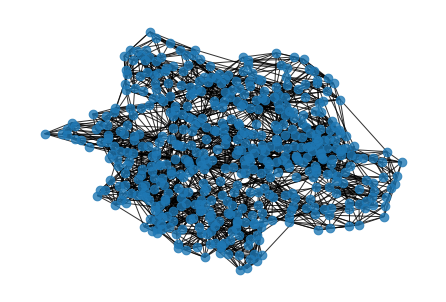

In [3]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()


## Actividad en clase

Usando el algoritmo **LOUVAIN**, haga lo siguiente:

- Genere 10 grafos Watts-Strogatz para **n=500**, **k=10** y **p** en {0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5}. 
- Corra **LOUVAIN** en estos grafos y encuentre la modularidad de la mejor partición en cada caso. 
- Grafique modularidad versus p.
- ¿Cuál es el efecto de **p** en la modularidad de las comunidades encontradas?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [4]:
range_p = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
modularities = []

for p in range_p:
    G = nx.watts_strogatz_graph(n, k, p)
    comms = community_louvain.best_partition(G)
    mod = modularity(comms, G)
    modularities.append(mod)
    

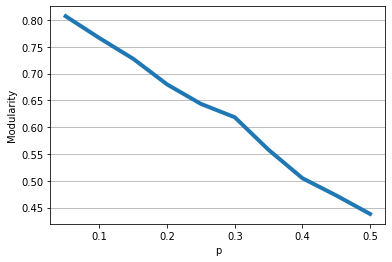

In [5]:
plt.plot(range_p, modularities, lw=4)
plt.grid(axis='y')
plt.xlabel('p')
plt.ylabel('Modularity')
plt.show()

La modularidad disminuye en la medida que p aumenta